## Task 1: Common steps of a Data Analysis Pipeline

Here are some common steps of an analysis pipeline (the order isn’t set, and not all elements are necessary):

1. Load Data

    - Check file types and encodings.

    - Check delimiters (space, comma, tab).

    - Skip rows and columns as needed.

2. Clean Data

    - Remove columns not being used.

    - Deal with “incorrect” data.

    - Deal with missing data.

3. Process Data

    - Create any new columns needed that are combinations or aggregates of other columns (examples include weighted averages, categorizations, groups, etc…).

    - Find and replace operations (examples inlcude replacing the string ‘Strongly Agree’ with the number 5).

    - Other substitutions as needed.

    - Deal with outliers.

4. Wrangle Data

    - Restructure data format (columns and rows).

    - Merge other data sources into your dataset.

5. Exploratory Data Analysis (not required for this Task).

6. Data Analysis (not required for this Task).

7. Export reports/data analyses and visualizations (not required for this Task).

For this Task, I will only ask you to set up a partial pipeline for the data loading, cleaning, processing, and wrangling steps.

## 1. Load Data

    - Check file types and encodings.

    - Check delimiters (space, comma, tab).

    - Skip rows and columns as needed.

In [12]:
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv("insurance.csv") #Load dataframe
df.head() #Display first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Clean Data

    - Remove columns not being used.

    - Deal with “incorrect” data.

    - Deal with missing data.

In [14]:
df2 = df
df2.drop(["children", "region"], inplace=True, axis=1)  #Drops the children and region columns
df2.head()
# df["smoker"].map(dict(yes=1, no=0))
# df2.replace(["yes", "no"], [1, 0]) #Replaces yes and no with 1 and 0

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


## 3. Process Data

    - Create any new columns needed that are combinations or aggregates of other columns (examples include weighted averages, categorizations, groups, etc…).

    - Find and replace operations (examples inlcude replacing the string ‘Strongly Agree’ with the number 5).

    - Other substitutions as needed.

    - Deal with outliers.

<AxesSubplot:xlabel='bmi'>

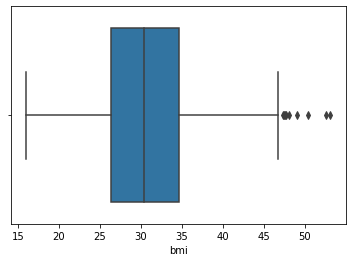

In [15]:
sns.boxplot(x='bmi',data=df2)    #Creates a boxplot based on BMI

Since we want health costs to be as directly related to smoking as possible, we want to use people
with average BMI's as higher BMI's could cause unrelated health costs.

In [24]:
df3 = df2[df2['bmi'] <= 45]    #Removes people with BMIs greater than 45
df3

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


<AxesSubplot:xlabel='bmi'>

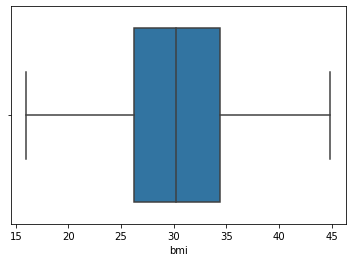

In [19]:
sns.boxplot(x='bmi',data=df3)    #Creates a boxplot based on BMI

They have been removed

## 4. Wrangle Data

    - Restructure data format (columns and rows).

    - Merge other data sources into your dataset.

In [31]:
df3
df4 = df3.reset_index()
print(df3)
print(df4)
del df4['index']
df4

      age     sex     bmi smoker      charges
0      19  female  27.900    yes  16884.92400
1      18    male  33.770     no   1725.55230
2      28    male  33.000     no   4449.46200
3      33    male  22.705     no  21984.47061
4      32    male  28.880     no   3866.85520
...   ...     ...     ...    ...          ...
1333   50    male  30.970     no  10600.54830
1334   18  female  31.920     no   2205.98080
1335   18  female  36.850     no   1629.83350
1336   21  female  25.800     no   2007.94500
1337   61  female  29.070    yes  29141.36030

[1318 rows x 5 columns]
      index  age     sex     bmi smoker      charges
0         0   19  female  27.900    yes  16884.92400
1         1   18    male  33.770     no   1725.55230
2         2   28    male  33.000     no   4449.46200
3         3   33    male  22.705     no  21984.47061
4         4   32    male  28.880     no   3866.85520
...     ...  ...     ...     ...    ...          ...
1313   1333   50    male  30.970     no  10600.54830

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1313,50,male,30.970,no,10600.54830
1314,18,female,31.920,no,2205.98080
1315,18,female,36.850,no,1629.83350
1316,21,female,25.800,no,2007.94500


Due to removing the outliers, our index need to be corrected as the 1317th value was now row 1337.
After adding a corrected index, the old one had to be deleted.